In [539]:
import time
from matplotlib import pyplot as plt
from PyARMViz import *

In [540]:
transactions = [
    ['Футболка','Брюки','Куртка','Кроссовки','Сумка','Шапка','Джинсы','Рубашка'],
    ['Платье','Сумка','Шапка','Джинсы'],
    ['Футболка','Джинсы','Рубашка','Кроссовки'],
    ['Кроссовки','Куртка','Рубашка','Галстук','Сумка','Футболка'],
    ['Футболка','Брюки','Сумка','Джинсы'],
    ['Шапка','Кроссовки','Куртка','Джинсы'],
    ['Кроссовки','Джинсы','Рубашка','Галстук','Куртка'],
    ['Футболка','Брюки','Галстук','Джинсы'],
    ['Джинсы','Рубашка','Сумка','Футболка','Куртка'],
    ['Футболка','Сумка','Шапка','Куртка','Рубашка','Кроссовки','Джинсы','Брюки'],
    ['Галстук','Футболка','Брюки'],
    ['Сумка','Футболка','Джинсы','Шапка'],
    ['Рубашка','Сумка','Куртка'],
    ['Рубашка','Куртка','Галстук','Кроссовки'],
    ['Куртка','Джинсы','Футболка','Сумка','Брюки'],
    ['Футболка','Брюки','Рубашка','Галстук','Джинсы'],
    ['Куртка','Футболка','Джинсы','Кроссовки'],
    ['Футболка','Кроссовки','Куртка','Сумка'],
    ['Сумка','Галстук','Брюки'],
    ['Футболка','Рубашка','Джинсы','Шапка','Куртка']
]

total_transactions = len(transactions)

In [541]:
times = {}

min_sup = 0.20

apriori

In [542]:
from apriori_python import apriori

start = time.time()
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.6)
times['apriori'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")
rules_pyarmviz = []   # список Rule для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # считаем поддержку прямо по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # создаём Rule для PyARMViz (нужны абсолютные counts)
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )
PyARMViz.metadata_scatter_plot(rules_pyarmviz)         # scatter support/confidence/lift
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)        # интерактивный граф связей
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)  # параллельные координаты
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)    # параллельные категории



Ассоциативные правила (достоверность ≥ 60%):
0: {'Брюки'} -> {'Сумка'} Support = 0.250 Confidence = 0.625 Lift = 1.136
1: {'Рубашка', 'Куртка'} -> {'Сумка'} Support = 0.250 Confidence = 0.625 Lift = 1.136
2: {'Кроссовки', 'Куртка'} -> {'Джинсы'} Support = 0.250 Confidence = 0.625 Lift = 0.893
3: {'Джинсы', 'Куртка'} -> {'Кроссовки'} Support = 0.250 Confidence = 0.625 Lift = 1.389
4: {'Джинсы', 'Куртка'} -> {'Рубашка'} Support = 0.250 Confidence = 0.625 Lift = 1.250
5: {'Рубашка', 'Куртка'} -> {'Джинсы'} Support = 0.250 Confidence = 0.625 Lift = 0.893
6: {'Футболка', 'Куртка'} -> {'Рубашка'} Support = 0.250 Confidence = 0.625 Lift = 1.250
7: {'Рубашка', 'Куртка'} -> {'Футболка'} Support = 0.250 Confidence = 0.625 Lift = 0.893
8: {'Футболка', 'Куртка'} -> {'Кроссовки'} Support = 0.250 Confidence = 0.625 Lift = 1.389
9: {'Кроссовки', 'Куртка'} -> {'Футболка'} Support = 0.250 Confidence = 0.625 Lift = 0.893
10: {'Кроссовки', 'Куртка'} -> {'Рубашка'} Support = 0.250 Confidence = 0.625 Lift

In [543]:
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")
rules_pyarmviz = []   # список Rule для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # считаем поддержку прямо по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # создаём Rule для PyARMViz (нужны абсолютные counts)
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )
PyARMViz.metadata_scatter_plot(rules_pyarmviz)         # scatter support/confidence/lift
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)        # интерактивный граф связей
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)  # параллельные координаты
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)    # параллельные категории



Ассоциативные правила (достоверность ≥ 80%):
0: {'Кроссовки', 'Джинсы'} -> {'Куртка'} Support = 0.250 Confidence = 0.833 Lift = 1.389
1: {'Кроссовки', 'Футболка'} -> {'Куртка'} Support = 0.250 Confidence = 0.833 Lift = 1.389
2: {'Кроссовки', 'Рубашка'} -> {'Куртка'} Support = 0.250 Confidence = 0.833 Lift = 1.389
3: {'Футболка', 'Брюки'} -> {'Джинсы'} Support = 0.300 Confidence = 0.857 Lift = 1.224
4: {'Футболка', 'Рубашка'} -> {'Джинсы'} Support = 0.300 Confidence = 0.857 Lift = 1.224
5: {'Джинсы', 'Рубашка'} -> {'Футболка'} Support = 0.300 Confidence = 0.857 Lift = 1.224
6: {'Сумка', 'Джинсы'} -> {'Футболка'} Support = 0.300 Confidence = 0.857 Lift = 1.224
7: {'Сумка', 'Куртка'} -> {'Футболка'} Support = 0.300 Confidence = 0.857 Lift = 1.224
8: {'Брюки'} -> {'Футболка'} Support = 0.350 Confidence = 0.875 Lift = 1.250
9: {'Кроссовки'} -> {'Куртка'} Support = 0.400 Confidence = 0.889 Lift = 1.481
10: {'Шапка'} -> {'Джинсы'} Support = 0.300 Confidence = 1.000 Lift = 1.429
11: {'Джинсы'

efficient_apriori

In [544]:
from efficient_apriori import apriori

start = time.time()
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.6)
times['efficient-apriori'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")

rules_pyarmviz = []  # список Rule для PyARMViz
rules_data = []      # для собственного графика draw_rules_graph

for i, r in enumerate(rules):
    ant = frozenset(r.lhs)
    cons = frozenset(r.rhs)
    union = ant | cons

    # считаем абсолютные количества по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans

    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(r.lhs)} -> {set(r.rhs)} "
          f"Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")

    # для PyARMViz нужны абсолютные counts
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(r.lhs),
            rhs=tuple(r.rhs),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )

# визуализация PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)



Ассоциативные правила (достоверность ≥ 60%):
0: {'Брюки'} -> {'Джинсы'} Support = 0.300 Confidence = 0.750 Lift = 1.071
1: {'Брюки'} -> {'Сумка'} Support = 0.250 Confidence = 0.625 Lift = 1.136
2: {'Брюки'} -> {'Футболка'} Support = 0.350 Confidence = 0.875 Lift = 1.250
3: {'Кроссовки'} -> {'Джинсы'} Support = 0.300 Confidence = 0.667 Lift = 0.952
4: {'Куртка'} -> {'Джинсы'} Support = 0.400 Confidence = 0.667 Lift = 0.952
5: {'Рубашка'} -> {'Джинсы'} Support = 0.350 Confidence = 0.700 Lift = 1.000
6: {'Сумка'} -> {'Джинсы'} Support = 0.350 Confidence = 0.636 Lift = 0.909
7: {'Футболка'} -> {'Джинсы'} Support = 0.550 Confidence = 0.786 Lift = 1.122
8: {'Джинсы'} -> {'Футболка'} Support = 0.550 Confidence = 0.786 Lift = 1.122
9: {'Шапка'} -> {'Джинсы'} Support = 0.300 Confidence = 1.000 Lift = 1.429
10: {'Куртка'} -> {'Кроссовки'} Support = 0.400 Confidence = 0.667 Lift = 1.481
11: {'Кроссовки'} -> {'Куртка'} Support = 0.400 Confidence = 0.889 Lift = 1.481
12: {'Рубашка'} -> {'Кроссовки

In [545]:
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")

rules_data = []       # для draw_rules_graph
rules_pyarmviz = []   # для PyARMViz

for i, r in enumerate(rules):
    ant = frozenset(r.lhs)
    cons = frozenset(r.rhs)
    union = ant | cons

    # абсолютные количества
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(r.lhs)} -> {set(r.rhs)} "
          f"Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")


    # для PyARMViz
    rules_pyarmviz.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(r.lhs),
            rhs=tuple(r.rhs),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )

# интерактивные графики PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)



Ассоциативные правила (достоверность ≥ 80%):
0: {'Брюки'} -> {'Футболка'} Support = 0.350 Confidence = 0.875 Lift = 1.250
1: {'Шапка'} -> {'Джинсы'} Support = 0.300 Confidence = 1.000 Lift = 1.429
2: {'Кроссовки'} -> {'Куртка'} Support = 0.400 Confidence = 0.889 Lift = 1.481
3: {'Рубашка'} -> {'Куртка'} Support = 0.400 Confidence = 0.800 Lift = 1.333
4: {'Сумка', 'Брюки'} -> {'Джинсы'} Support = 0.200 Confidence = 0.800 Lift = 1.143
5: {'Футболка', 'Брюки'} -> {'Джинсы'} Support = 0.300 Confidence = 0.857 Lift = 1.224
6: {'Джинсы', 'Брюки'} -> {'Футболка'} Support = 0.300 Confidence = 1.000 Lift = 1.429
7: {'Сумка', 'Брюки'} -> {'Футболка'} Support = 0.200 Confidence = 0.800 Lift = 1.143
8: {'Кроссовки', 'Джинсы'} -> {'Куртка'} Support = 0.250 Confidence = 0.833 Lift = 1.389
9: {'Шапка', 'Куртка'} -> {'Джинсы'} Support = 0.200 Confidence = 1.000 Lift = 1.429
10: {'Футболка', 'Рубашка'} -> {'Джинсы'} Support = 0.300 Confidence = 0.857 Lift = 1.224
11: {'Джинсы', 'Рубашка'} -> {'Футболк

fpgrowth_py

In [546]:
from fpgrowth_py import fpgrowth

start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.6)
times['fpgrowth-py'] = time.time() - start

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 60%):")

rules_data_fp = []     # для draw_rules_graph
rules_pyarmviz_fp = [] # для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # абсолютные количества по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # для PyARMViz — нужны абсолютные counts
    rules_pyarmviz_fp.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )

# визуализация PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz_fp)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz_fp)



Ассоциативные правила (достоверность ≥ 60%):
0: {'Шапка'} -> {'Сумка'} Support = 0.200 Confidence = 0.667 Lift = 1.212
1: {'Шапка'} -> {'Сумка', 'Джинсы'} Support = 0.200 Confidence = 0.667 Lift = 1.905
2: {'Сумка', 'Шапка'} -> {'Джинсы'} Support = 0.200 Confidence = 1.000 Lift = 1.429
3: {'Шапка', 'Джинсы'} -> {'Сумка'} Support = 0.200 Confidence = 0.667 Lift = 1.212
4: {'Шапка'} -> {'Куртка'} Support = 0.200 Confidence = 0.667 Lift = 1.111
5: {'Шапка'} -> {'Джинсы', 'Куртка'} Support = 0.200 Confidence = 0.667 Lift = 1.667
6: {'Шапка', 'Джинсы'} -> {'Куртка'} Support = 0.200 Confidence = 0.667 Lift = 1.111
7: {'Шапка', 'Куртка'} -> {'Джинсы'} Support = 0.200 Confidence = 1.000 Lift = 1.429
8: {'Шапка'} -> {'Футболка'} Support = 0.200 Confidence = 0.667 Lift = 0.952
9: {'Шапка'} -> {'Футболка', 'Джинсы'} Support = 0.200 Confidence = 0.667 Lift = 1.212
10: {'Шапка', 'Джинсы'} -> {'Футболка'} Support = 0.200 Confidence = 0.667 Lift = 0.952
11: {'Шапка', 'Футболка'} -> {'Джинсы'} Suppor

In [547]:
from fpgrowth_py import fpgrowth
import PyARMViz  # pip install pyarmviz

freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.8)

n_trans = len(transactions)

print("\nАссоциативные правила (достоверность ≥ 80%):")

rules_data_fp = []      # для draw_rules_graph
rules_pyarmviz_fp = []  # для PyARMViz

for i, (antecedent, consequent, confidence) in enumerate(rules):
    ant = frozenset(antecedent)
    cons = frozenset(consequent)
    union = ant | cons

    # абсолютные количества по транзакциям
    count_ab = sum(1 for t in transactions if union.issubset(t))
    count_a = sum(1 for t in transactions if ant.issubset(t))
    count_b = sum(1 for t in transactions if cons.issubset(t))

    support_ab = count_ab / n_trans
    support_a = count_a / n_trans
    support_b = count_b / n_trans
    lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

    print(f"{i}: {set(antecedent)} -> {set(consequent)} "
          f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

    # сразу формируем Rule для PyARMViz (нужны абсолютные counts)
    rules_pyarmviz_fp.append(
        PyARMViz.Rule.Rule(
            lhs=tuple(antecedent),
            rhs=tuple(consequent),
            count_full=count_ab,
            count_lhs=count_a,
            count_rhs=count_b,
            num_transactions=n_trans
        )
    )


# интерактивные графики PyARMViz
PyARMViz.metadata_scatter_plot(rules_pyarmviz_fp)
PyARMViz.adjacency_graph_plotly(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz_fp)
# PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz_fp)



Ассоциативные правила (достоверность ≥ 80%):
0: {'Сумка', 'Шапка'} -> {'Джинсы'} Support = 0.200 Confidence = 1.000 Lift = 1.429
1: {'Шапка', 'Куртка'} -> {'Джинсы'} Support = 0.200 Confidence = 1.000 Lift = 1.429
2: {'Шапка', 'Футболка'} -> {'Джинсы'} Support = 0.200 Confidence = 1.000 Lift = 1.429
3: {'Шапка'} -> {'Джинсы'} Support = 0.300 Confidence = 1.000 Lift = 1.429
4: {'Сумка', 'Футболка', 'Брюки'} -> {'Джинсы'} Support = 0.200 Confidence = 1.000 Lift = 1.429
5: {'Сумка', 'Джинсы', 'Брюки'} -> {'Футболка'} Support = 0.200 Confidence = 1.000 Lift = 1.429
6: {'Футболка', 'Брюки'} -> {'Джинсы'} Support = 0.300 Confidence = 0.857 Lift = 1.224
7: {'Джинсы', 'Брюки'} -> {'Футболка'} Support = 0.300 Confidence = 1.000 Lift = 1.429
8: {'Брюки'} -> {'Футболка'} Support = 0.350 Confidence = 0.875 Lift = 1.250
9: {'Сумка', 'Кроссовки'} -> {'Футболка'} Support = 0.200 Confidence = 1.000 Lift = 1.429
10: {'Сумка', 'Кроссовки'} -> {'Куртка'} Support = 0.200 Confidence = 1.000 Lift = 1.667
1

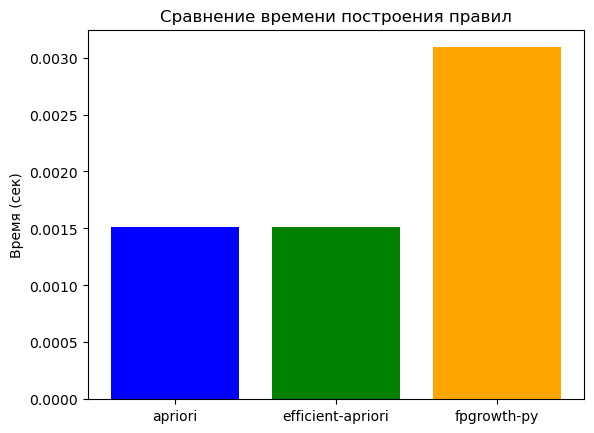

In [548]:
plt.bar(times.keys(), times.values(), color=['blue','green','orange'])
plt.ylabel("Время (сек)")
plt.title("Сравнение времени построения правил")
plt.show()